In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('possum.csv')

In [10]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


### 2 missing values for age, 1 for footlgth

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [3]:
# Replacing the missing age values with the mean
df['age'].fillna(df['age'].mean(), inplace=True)

In [4]:
# Doing the same for footlgth
df['footlgth'].fillna(df['footlgth'].mean(), inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


### Case and site are not useful columns and can be dropped. While population may factor into the sizes of the possums I will drop it as well for the sake of this project.

In [7]:
df = df.drop(['case', 'site', 'Pop'], axis=1)

In [8]:
df

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...
99,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [9]:
df = pd.get_dummies(df)

In [10]:
df

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_f,sex_m
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,1
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0,1
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0,1
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1,0
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0,1


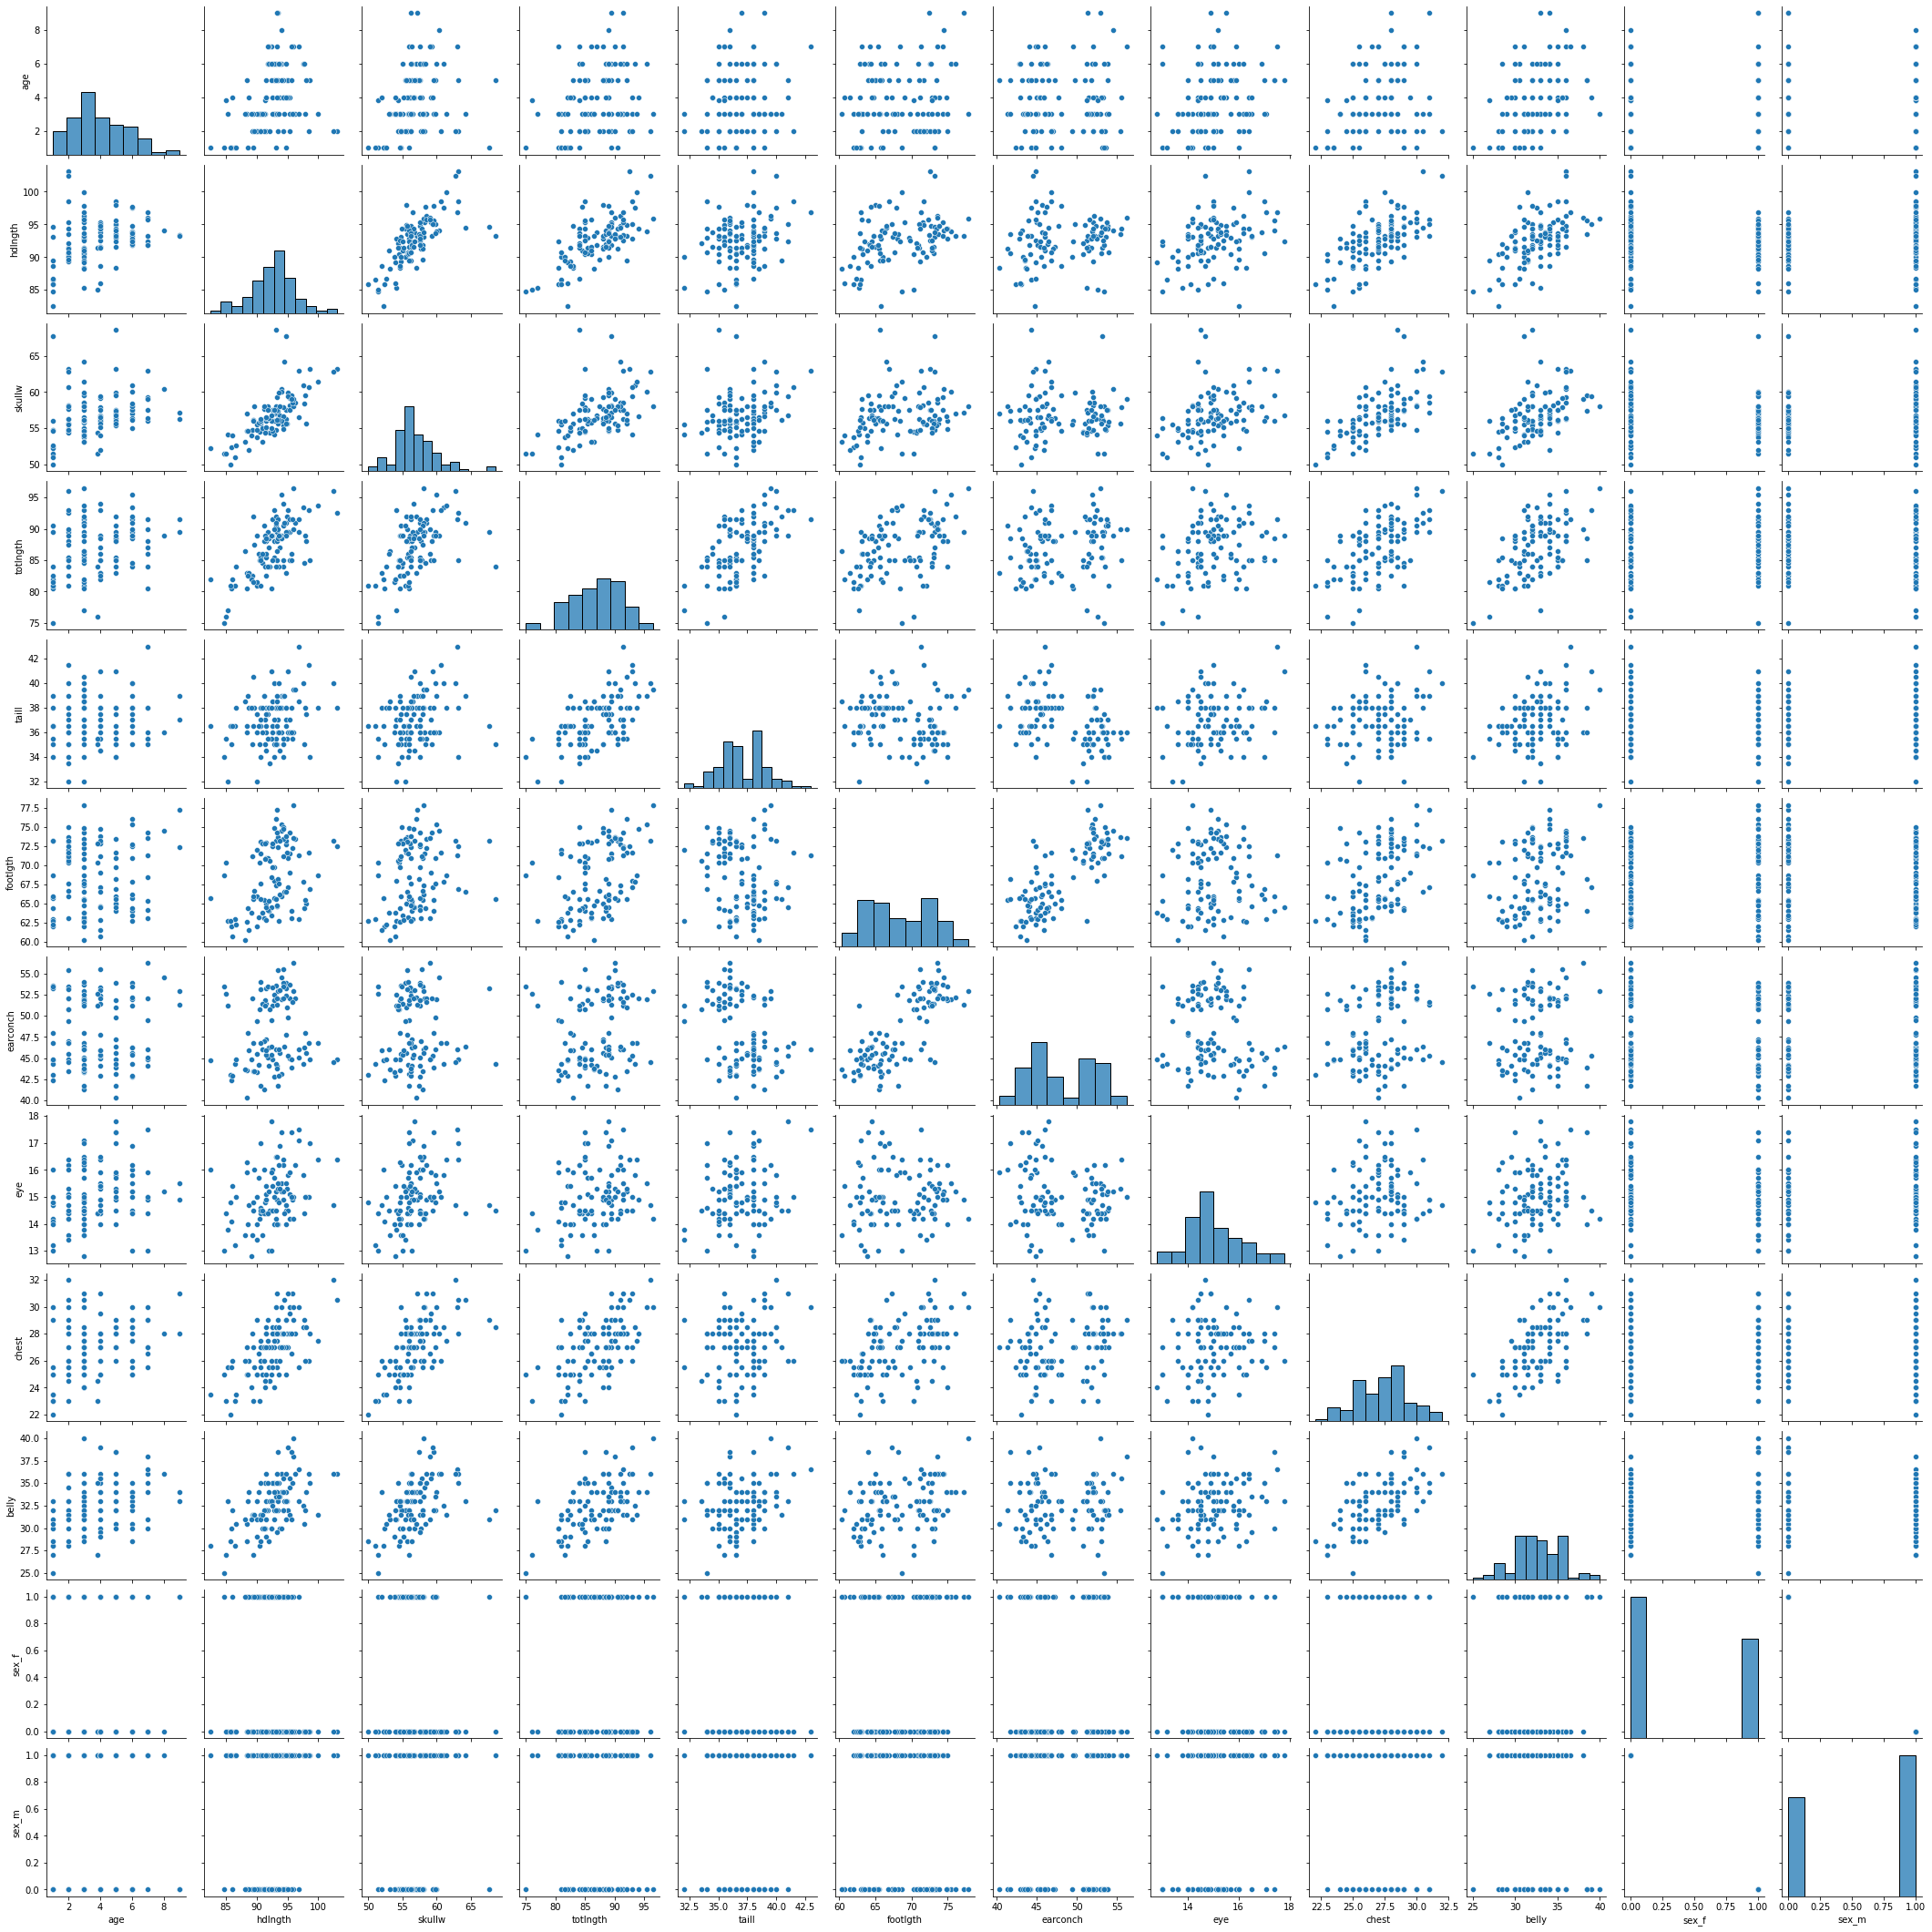

In [19]:
sns.pairplot(df)

<AxesSubplot:>

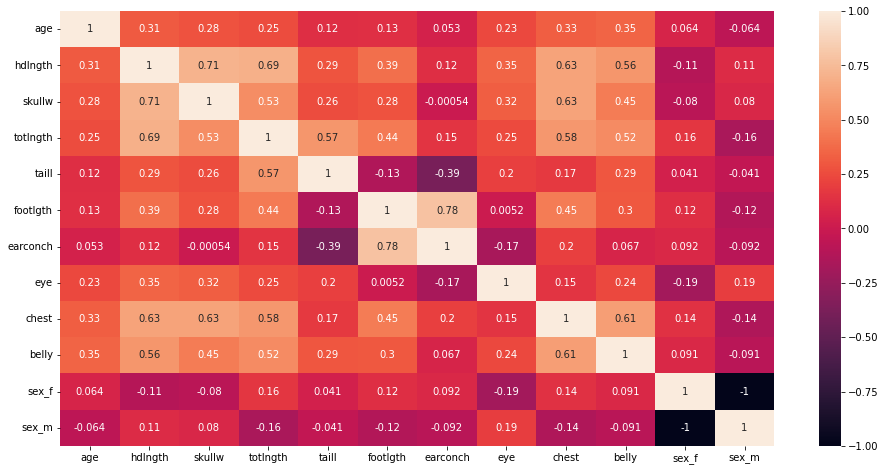

In [22]:
plt.figure(figsize=(16,8))

sns.heatmap(df.corr(), annot=True)

### Head length, chest size and tail length are the have the most correlation to total length. I will use these for the regression model.

In [23]:
df[['sex_f', 'sex_m']].sum()

sex_f    43
sex_m    61
dtype: int64

### Needed to check the distribution between males and females before getting too carried away. This seems relatively even so I will leave as is.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
x = df[['hdlngth', 'taill', 'chest']]

y = df['totlngth']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2)

In [27]:
model = LinearRegression().fit(X_train, y_train)

model.score(X_train, y_train)

0.7145348480948871

### Pretty good coefficient of determination for the training dataset. 70% of a possum's total length can be determined by the variables in our model (on the training data at least).

In [28]:
y_pred = model.predict(X_test)

In [34]:
r2_score(y_test, y_pred)

0.3983849889063509

### Much lower r2 score for the test dataset. Evidence of overfitting that needs to be investigated.

In [36]:
mean_squared_error(y_test, y_pred)

9.082295254383821

In [39]:
len(X_test)

26

### I think the most likely cause for overfitting is lack of samples. Test dataset only has 26 records.

In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=.37, random_state=2)

In [41]:
model2 = LinearRegression().fit(X_train2, y_train2)

model2.score(X_train2, y_train2)

0.7248228179495995

In [42]:
y_pred2 = model.predict(X_test2)

r2_score(y_test2, y_pred2)

0.49300463167002717

### 10% improvement in r2 score from just changing the test size to 37% from the default 25%

In [43]:
X_test_array2 = np.array(X_test2)

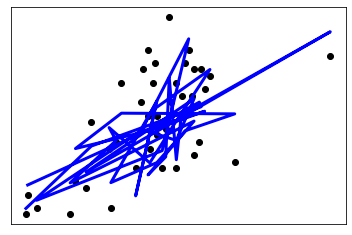

In [45]:
plt.scatter(X_test_array2[:,0], y_test2, color="black")
plt.plot(X_test_array2[:,0], y_pred2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<AxesSubplot:xlabel='totlngth', ylabel='Count'>

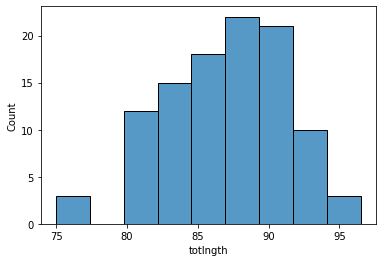

In [30]:
sns.histplot(x=df['totlngth'])

<AxesSubplot:xlabel='totlngth'>

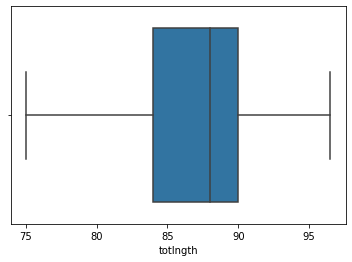

In [24]:
sns.boxplot(x=df['totlngth'], data=df)

In [32]:
df.sort_values(by='totlngth', ascending=True)

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_f,sex_m
38,1.000000,84.7,51.5,75.0,34.0,68.7,53.4,13.0,25.0,25.0,1,0
43,3.833333,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0,0,1
41,3.000000,85.3,54.1,77.0,32.0,62.7,51.2,13.8,25.5,33.0,0,1
71,1.000000,85.9,52.4,80.5,35.0,62.0,42.4,14.1,25.5,30.0,0,1
83,3.000000,88.4,54.6,80.5,36.0,62.6,43.6,16.3,25.0,28.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
55,3.000000,99.9,61.5,93.7,38.0,68.7,46.8,16.4,27.5,31.5,0,1
31,4.000000,94.3,56.7,94.0,39.0,74.8,52.0,14.9,28.0,34.0,1,0
2,6.000000,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0
58,2.000000,102.5,62.8,96.0,40.0,73.2,44.5,14.7,32.0,36.0,0,1


In [37]:
df['age'].value_counts()

3.000000    27
2.000000    16
4.000000    14
5.000000    13
6.000000    12
1.000000    10
7.000000     7
9.000000     2
3.833333     2
8.000000     1
Name: age, dtype: int64

In [41]:
df.loc[(df['age'] > 3) & (df['age'] < 4)]

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_f,sex_m
43,3.833333,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0,0,1
45,3.833333,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0,0,1


## Going to try using all features this time

In [17]:
target = ['totlngth']

x_af_list = list(x for x in df.columns if x not in target)

In [18]:
x_af = df[x_af_list]

In [19]:
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(x_af, y, random_state=2)

In [20]:
model = LinearRegression().fit(X_train_af, y_train_af)

model.score(X_train_af, y_train_af)

0.7683514521671284

In [21]:
y_pred_af = model.predict(X_test_af)

In [23]:
r2_score(y_test_af, y_pred_af)

0.6209569033425635

### 13% improvement here by using all features (go figure i guess). 62% of the total length can be explained by using all of the features.